In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Room dimensions
room_width = 10
room_height = 10

# Furniture list (label, width, height)
furniture_list = [
    {"label": "Bed", "width": 3, "height": 2},
    {"label": "Table", "width": 2, "height": 2},
    {"label": "Sofa", "width": 3, "height": 1}
]

# Obstacle position and size (x, y, width, height)
obstacles = [
    {"x": 4, "y": 4, "width": 2, "height": 2}  # Example obstacle
]


In [ ]:
def place_furniture(room_width, room_height, furniture_list, obstacles):
    placed_furniture = []
    grid = np.zeros((room_height, room_width))  # Room grid (0 = empty, 1 = occupied)

    # Mark obstacles on the grid
    for obstacle in obstacles:
        x_start = obstacle["x"]
        y_start = obstacle["y"]
        x_end = x_start + obstacle["width"]
        y_end = y_start + obstacle["height"]
        grid[y_start:y_end, x_start:x_end] = 1

    # Place each piece of furniture
    for furniture in furniture_list:
        placed = False
        for y in range(room_height - furniture["height"] + 1):
            for x in range(room_width - furniture["width"] + 1):
                # Check if the space is free
                if np.all(grid[y:y + furniture["height"], x:x + furniture["width"]] == 0):
                    # Mark the space as occupied
                    grid[y:y + furniture["height"], x:x + furniture["width"]] = 1
                    placed_furniture.append({"label": furniture["label"], "x": x, "y": y,
                                             "width": furniture["width"], "height": furniture["height"]})
                    placed = True
                    break
            if placed:
                break

    return placed_furniture


In [ ]:
# Get placed furniture positions
placed_furniture = place_furniture(room_width, room_height, furniture_list, obstacles)

# Print results for debugging purposes
print("Placed Furniture:")
for item in placed_furniture:
    print(item)


Placed Furniture:
{'label': 'Bed', 'x': 0, 'y': 0, 'width': 3, 'height': 2}
{'label': 'Table', 'x': 3, 'y': 0, 'width': 2, 'height': 2}
{'label': 'Sofa', 'x': 5, 'y': 0, 'width': 3, 'height': 1}


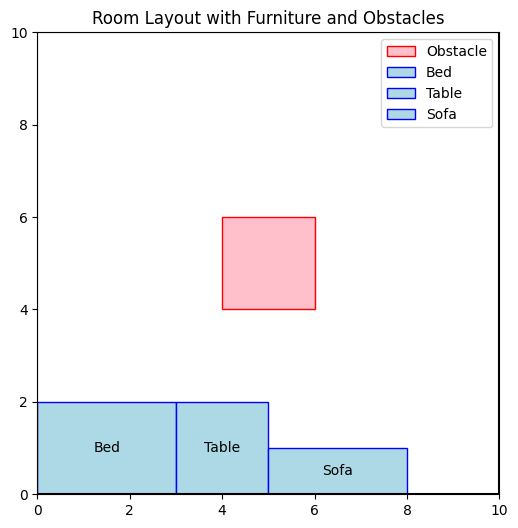

In [ ]:
# Create plot
plt.figure(figsize=(6, 6))

# Draw room boundaries
plt.plot([0, room_width], [0, 0], color="black")  # Bottom wall
plt.plot([0, room_width], [room_height, room_height], color="black")  # Top wall
plt.plot([0, 0], [0, room_height], color="black")  # Left wall
plt.plot([room_width, room_width], [0, room_height], color="black")  # Right wall

# Draw obstacles
for obstacle in obstacles:
    plt.gca().add_patch(plt.Rectangle((obstacle["x"], obstacle["y"]), obstacle["width"], obstacle["height"],
                                       edgecolor="red", facecolor="pink", label="Obstacle"))

# Draw placed furniture
for item in placed_furniture:
    plt.gca().add_patch(plt.Rectangle((item["x"], item["y"]), item["width"], item["height"],
                                       edgecolor="blue", facecolor="lightblue", label=item["label"]))
    plt.text(item["x"] + item["width"] / 2, item["y"] + item["height"] / 2,
             item["label"], color="black", ha="center", va="center")

# Set axes limits and aspect ratio
plt.xlim(0, room_width)
plt.ylim(0, room_height)
plt.gca().set_aspect('equal', adjustable='box')

# Add title and legend
plt.title("Room Layout with Furniture and Obstacles")
handles_labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(handles_labels[1], handles_labels[0]))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Show plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
num_samples = 1000

# Room dimensions (width x height)
room_sizes = np.random.randint(8, 15, size=(num_samples, 2))

# Furniture dimensions (width x height)
furniture_sizes = np.random.randint(1, 5, size=(num_samples, 2))

# Obstacle positions (x, y)
obstacle_positions = np.random.randint(0, 10, size=(num_samples, 2))

# Optimal placements (center alignment as an example)
placements = []
for i in range(num_samples):
    room_width, room_height = room_sizes[i]
    furniture_width, furniture_height = furniture_sizes[i]
    obstacle_x, obstacle_y = obstacle_positions[i]

    # Default placement: center alignment avoiding obstacles
    x_pos = (room_width - furniture_width) // 2
    y_pos = (room_height - furniture_height) // 2

    # Adjust placement if there's an obstacle
    if (obstacle_x <= x_pos + furniture_width and
        obstacle_x + 2 >= x_pos and
        obstacle_y <= y_pos + furniture_height and
        obstacle_y + 2 >= y_pos):
        x_pos = max(0, x_pos - 1)  # Shift left
        y_pos = max(0, y_pos - 1)  # Shift up

    placements.append([x_pos, y_pos])

placements = np.array(placements)

# Combine features and labels into a DataFrame
data = pd.DataFrame(
    np.hstack((room_sizes, furniture_sizes, obstacle_positions, placements)),
    columns=["room_width", "room_height", "furniture_width", "furniture_height",
             "obstacle_x", "obstacle_y", "x_position", "y_position"]
)

print(data.head())


   room_width  room_height  furniture_width  furniture_height  obstacle_x  \
0          14           11                4                 1           4   
1          12           14                4                 2           8   
2          10           12                1                 3           5   
3          12           14                2                 3           5   
4           9           10                4                 4           8   

   obstacle_y  x_position  y_position  
0           2           5           5  
1           3           4           6  
2           1           4           4  
3           2           5           5  
4           1           2           3  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split dataset into features (X) and labels (y)
X = data[["room_width", "room_height", "furniture_width", "furniture_height", "obstacle_x", "obstacle_y"]]
y = data[["x_position", "y_position"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Test prediction for a new room configuration
test_room = [12, 12]   # Room dimensions (width x height)
test_furniture = [3, 4]   # Furniture dimensions (width x height)
test_obstacle = [5, 5]   # Obstacle position (x, y)

predicted_placement = model.predict([test_room + test_furniture + test_obstacle])
print(f"Predicted Placement (x,y): {predicted_placement}")


Mean Squared Error: 0.26174534556814955
Predicted Placement (x,y): [[3.88342476 3.35363379]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
